In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
df_r1 = pd.read_csv('../WithoutInterimManager.csv')

In [3]:
df_r1.drop('Employee Code', axis=1, inplace=True)
df_r1.drop('Employee_Name', axis=1, inplace=True)
df_r1.drop('Over18', axis=1, inplace=True)
df_r1.drop('Stock Option Level', axis=1, inplace=True)
df_r1.drop('Direct Report', axis=1, inplace=True)
df_r1.drop('Date Of Joining', axis=1, inplace=True)
df_r1.drop('Date of Attrition', axis=1, inplace=True)
df_r1.drop('LWD', axis=1, inplace=True)
df_r1.drop('Exit interview comments - HR', axis=1, inplace=True)
df_r1.drop('Process', axis=1, inplace=True)

In [4]:
df_r1=df_r1.dropna()
df_r1.isnull().sum()

Interim Manager                  0
Band                             0
Department                       0
Designation                      0
Education Field                  0
Gender                           0
Age                              0
Salary                           0
Rating                           0
Happiness index                  0
Distance from current Address    0
Attrition Status                 0
Marital Status                   0
dtype: int64

In [5]:
df_r1['Attrition Status'] = df_r1['Attrition Status'].map({'No':0, 'Yes':1})


In [6]:
df_dummy = pd.get_dummies(df_r1)
df_dummy.head()


,Age,Happiness index,Distance from current Address,Attrition Status,Marital Status,Interim Manager_Adam Leyva,Interim Manager_Aileen Palmiter,Interim Manager_Ann Hoffman,Interim Manager_Barbara Medel,Interim Manager_Barbara Towell,...,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Fair,Salary_Good,Rating_A,Rating_B,Rating_C,Rating_D
0,23.0,3.0,3.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,45.0,1.0,2.0,1,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,37.0,3.0,4.0,0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,28.0,1.0,1.0,1,1.0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4,30.0,2.0,3.0,1,1.0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [7]:
df_r1_model = df_dummy

y = df_r1_model['Attrition Status']
X = df_r1_model.drop('Attrition Status', axis=1, inplace=False)

In [8]:
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()

col_names = ['Age', 'Happiness index', 'Distance from current Address', 'Marital Status']

features = X_scaled[col_names]
#print(features.values)
scaler = StandardScaler().fit(features.values)#Standardising the values, to perform consistetly.
features = scaler.transform(features.values)

X_scaled[col_names] = features
X_scaled.head()

,Age,Happiness index,Distance from current Address,Marital Status,Interim Manager_Adam Leyva,Interim Manager_Aileen Palmiter,Interim Manager_Ann Hoffman,Interim Manager_Barbara Medel,Interim Manager_Barbara Towell,Interim Manager_Betty Utterback,...,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Fair,Salary_Good,Rating_A,Rating_B,Rating_C,Rating_D
0,-0.982507,-0.005762,-0.360012,-1.152960,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,2.621263,-1.560189,-1.008885,0.867333,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,1.310801,-0.005762,0.288860,0.867333,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,-0.163469,-1.560189,-1.657757,0.867333,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4,0.164147,-0.782976,-0.360012,0.867333,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

# without pca


In [20]:
from xgboost import XGBClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time
start = time.time()
xgb = XGBClassifier()
model = xgb.fit(X_train, y_train)
pickle.dump(model, open("modelr1.pickle.pkl", "wb"))

end = time.time()
xgb_time = end-start
print('Train Time (seconds) of XGBOOST without PCA:',xgb_time)

Train Time (seconds) of XGBOOST without PCA: 0.9589998722076416


            Age  Happiness index  Distance from current Address  \
7419  -1.310123        -0.782976                      -1.008885   
6533  -0.818700         1.548665                       0.288860   
7256   1.474608        -1.560189                      -0.360012   
4497  -0.654892        -0.005762                       0.288860   
9721   1.310801        -1.560189                      -1.008885   
...         ...              ...                            ...   
793   -1.146315         1.548665                      -1.008885   
1993  -0.491084         1.548665                      -0.360012   
10311  0.983185        -1.560189                       0.288860   
8952  -0.327277         0.771451                       0.937732   
9799  -0.818700         1.548665                       0.288860   

       Marital Status  Interim Manager_Adam Leyva  \
7419        -1.152960                           0   
6533        -1.152960                           0   
7256         0.867333               

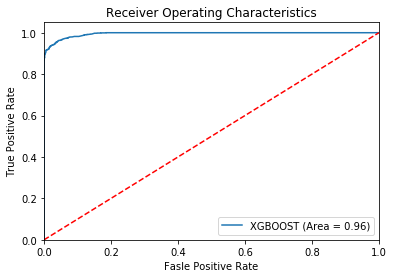


Confusion Matrix
[[2200   57]
 [  72 1151]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2257
           1       0.95      0.94      0.95      1223

    accuracy                           0.96      3480
   macro avg       0.96      0.96      0.96      3480
weighted avg       0.96      0.96      0.96      3480



In [11]:
print(X_test)
y_pred_xgb = model.predict(X_test)

xgb_roc_auc = roc_auc_score(y_test,y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test,xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (Area = %0.2f)' % xgb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_xgb = confusion_matrix(y_test,y_pred_xgb)
print("\nConfusion Matrix")
print(confusion_matrix_xgb)

classify_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report")
print(classify_xgb)

In [12]:
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.29%


# with pca

In [13]:
from sklearn.decomposition import PCA


n = 90
pca = PCA(n/100)


pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 30 components


In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
start = time.time()

xgb_pca = XGBClassifier()
model = xgb_pca.fit(X_train_pca, y_train)

end = time.time()
xgb_time_pca = end-start
print('Train Time (seconds) of XGBOOST with PCA:',xgb_time_pca)

Train Time (seconds) of XGBOOST with PCA: 1.0190091133117676


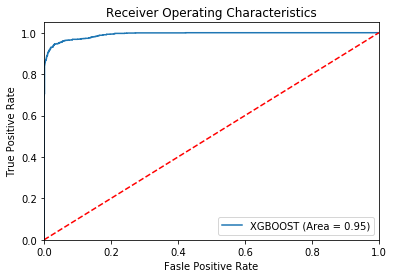


Confusion Matrix
[[2194   63]
 [  77 1146]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2257
           1       0.95      0.94      0.94      1223

    accuracy                           0.96      3480
   macro avg       0.96      0.95      0.96      3480
weighted avg       0.96      0.96      0.96      3480



In [16]:
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)

xgb_roc_auc_pca = roc_auc_score(y_test,y_pred_xgb_pca)
fpr, tpr, thresholds = roc_curve(y_test,xgb_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (Area = %0.2f)' % xgb_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_xgb_pca = confusion_matrix(y_test,y_pred_xgb_pca)
print("\nConfusion Matrix")
print(confusion_matrix_xgb_pca)

classify_xgb_pca = classification_report(y_test, y_pred_xgb_pca)
print("\nClassification Report")
print(classify_xgb_pca)

In [17]:

loaded_model = pickle.load(open("modelr1.pickle.dat", "rb"))

y_pred = loaded_model.predict(X_test)

In [18]:
print(y_pred)

[1 0 1 ... 1 0 0]


In [19]:
X_test.head()

,Age,Happiness index,Distance from current Address,Marital Status,Interim Manager_Adam Leyva,Interim Manager_Aileen Palmiter,Interim Manager_Ann Hoffman,Interim Manager_Barbara Medel,Interim Manager_Barbara Towell,Interim Manager_Betty Utterback,...,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Fair,Salary_Good,Rating_A,Rating_B,Rating_C,Rating_D
7419,-1.310123,-0.782976,-1.008885,-1.152960,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
6533,-0.818700,1.548665,0.288860,-1.152960,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7256,1.474608,-1.560189,-0.360012,0.867333,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4497,-0.654892,-0.005762,0.288860,-1.152960,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
9721,1.310801,-1.560189,-1.008885,0.867333,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
